# Data Science HW #5
Jason Barbarosh

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
import seaborn as sb
import random

%matplotlib inline

/Users/Jason/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Import the data

In [2]:
df = pd.read_csv("PSID.txt", sep="\t")
df.head()

,ER60001,ER60002,ER60017,ER60018,ER60167,ER62366,ER62506,ER64612,ER64810,ER65349,ER65459
0,1,8474,57,2,5,4,0,5,1,60704,11
1,1,1428,41,2,5,3,0,5,1,45084,12
2,1,4738,39,1,0,2,0,1,1,52000,10
3,1,6780,38,1,0,4,0,5,1,35000,13
4,1,7304,34,1,5,4,0,1,1,31560,11


In [3]:
df.describe()

,ER60001,ER60002,ER60017,ER60018,ER60167,ER62366,ER62506,ER64612,ER64810,ER65349,ER65459
count,9048.0,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9.048000e+03,9048.000000
mean,1.0,4534.549072,45.654730,1.329244,1.408378,2.554377,0.264920,4.106764,1.692418,6.954035e+04,14.570955
std,0.0,2620.837601,16.528586,0.469965,2.241426,1.086979,0.889743,1.701723,1.316793,9.456179e+04,10.308990
min,1.0,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-2.200000e+04,0.000000
25%,1.0,2263.750000,32.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,2.400000e+04,12.000000
50%,1.0,4531.500000,43.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,4.931250e+04,13.000000
75%,1.0,6803.250000,58.000000,2.000000,5.000000,3.000000,0.000000,5.000000,2.000000,9.021125e+04,16.000000
max,1.0,9080.000000,102.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.250100e+06,99.000000


Records which contain a feature code that denote ‘missing’ or ‘refused to answer’ should be dropped from the dataset. Categorical features should be transformed to discrete values, and features should be normalized. Once this step is complete, we should apply logistic regression model. In this homework, please spend some time on analysis and discussion . If its easier, you can submit your discussion as a separate .txt, .pdf or word document rather than including the discussion in the .ipython code.

To begin, you’ll need to clean the data set: (1) remove observations in which the respondent
did not know the answer, refused to answer, or skipped the question, (2) if the variable is
binary, specify it as 0 or 1, (3) if the variable is ordered or categorical, discretize the variable
by creating indicator variables for each category, (4) transform large numbers to make them
usable


## Clean the data

In [4]:
# Rename the columns
names = {
    "ER60001": "Release_Num",
    "ER60002": "ID",
    "ER60017": "Age",
    "ER60018": "Male",
    "ER60167": "Work",
    "ER62366": "Health_Now",
    "ER62506": "Health_Young",
    "ER64612": "NoHealthIns",
    "ER64810": "Race",
    "ER65349": "Income",
    "ER65459": "Educ"
}

for col in df.columns:
    if col in names:
        df = df.rename(columns = {col:names[col]})
df.head()

,Release_Num,ID,Age,Male,Work,Health_Now,Health_Young,NoHealthIns,Race,Income,Educ
0,1,8474,57,2,5,4,0,5,1,60704,11
1,1,1428,41,2,5,3,0,5,1,45084,12
2,1,4738,39,1,0,2,0,1,1,52000,10
3,1,6780,38,1,0,4,0,5,1,35000,13
4,1,7304,34,1,5,4,0,1,1,31560,11


In [5]:
def reAssign(data, i, j, k):
    l = []
    for x in data:
        if x == i:
            l.append(j)
        else:
            l.append(k)
    return l

In [6]:
# Remove extraneous variables

# Drop work variable
df = df.drop(["Work"], axis = 1)

# Clean Age
df = df[df.Age != 999]

# Clean Male
df.Male = reAssign(df.Male, 2, 0, 1)

# Clean Health_Now 
df = df[df.Health_Now != 8] 
df = df[df.Health_Now != 9] 

# Clean Health_Young
df = df[df.Health_Young != 8] 
df = df[df.Health_Young != 9] 
df = df[df.Health_Young != 0] 

# Clean NoHealthIns
df = df[df.NoHealthIns != 8] 
df = df[df.NoHealthIns != 9] 
df.NoHealthIns = reAssign(df.NoHealthIns, 5, 0, 1)

# Clean Race
df = df[df.Race != 9] 

# Clean Education
df = df[df.Educ != 99] 

# Clean Income
df = df[df.Income >= 0]

In [7]:
df.head()

,Release_Num,ID,Age,Male,Health_Now,Health_Young,NoHealthIns,Race,Income,Educ
9,1,7098,20,1,3,3,0,1,135700,12
11,1,2571,37,1,3,3,0,1,88520,12
12,1,987,64,1,5,5,0,1,20394,9
32,1,3856,22,0,5,4,0,1,2450,12
70,1,5223,19,1,1,1,0,1,206500,12


In [8]:
# Log income
df.Income = list(map(lambda x: np.log(x+1), df.Income))

Group categories to better distribute vars.

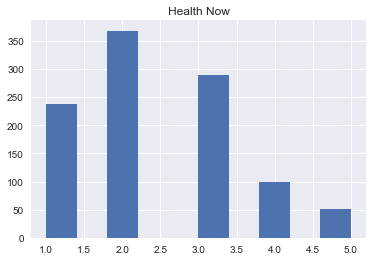

In [9]:
plt.hist(df.Health_Now)
plt.title("Health Now")

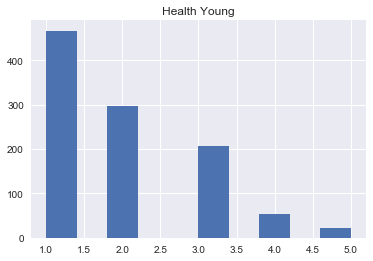

In [10]:
plt.hist(df.Health_Young)
plt.title("Health Young")

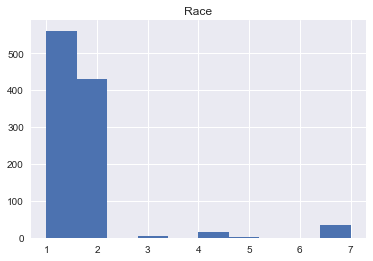

In [11]:
plt.hist(df.Race)
plt.title("Race")

In [12]:
# Discretize categorical vars
df = pd.get_dummies(df, columns=["Health_Now", "Health_Young", "Race"], drop_first=True)
df.head()

,Release_Num,ID,Age,Male,NoHealthIns,Income,Educ,Health_Now_2,Health_Now_3,Health_Now_4,Health_Now_5,Health_Young_2,Health_Young_3,Health_Young_4,Health_Young_5,Race_2,Race_3,Race_4,Race_5,Race_7
9,1,7098,20,1,0,11.818209,12,0,1,0,0,0,1,0,0,0,0,0,0,0
11,1,2571,37,1,0,11.390995,12,0,1,0,0,0,1,0,0,0,0,0,0,0
12,1,987,64,1,0,9.923045,9,0,0,0,1,0,0,0,1,0,0,0,0,0
32,1,3856,22,0,0,7.804251,12,0,0,0,1,0,0,1,0,0,0,0,0,0
70,1,5223,19,1,0,12.238061,12,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Combine categorical vars to emilinate perfect multicollinearity and better distribute vars

# Vars to rename
df = df.rename(columns={
                        "Health_Now_2":"Now_Good_Health",
                        "Health_Young_2":"Young_Good_Health",
                        "Race_1":"White",
                        "Race_2":"Black",
                        "Income":"LnInc"})

# Vars to Add
df["Now_Poor_Health"] = df.Health_Now_3 + df.Health_Now_4 + df.Health_Now_5
df["Young_Poor_Health"] = df.Health_Young_3 + df.Health_Young_4 + df.Health_Young_5
df["Other_Race"] = df.Race_3 + df.Race_4 + df.Race_5 + df.Race_7

# Vars to drop
df = df.drop(['Health_Now_3', 'Health_Now_4', 'Health_Now_5',
             'Health_Young_3', 'Health_Young_4', 'Health_Young_5',
             "Race_3", "Race_4", "Race_5", "Race_7"], axis = 1)


In [14]:
df.head()

,Release_Num,ID,Age,Male,NoHealthIns,LnInc,Educ,Now_Good_Health,Young_Good_Health,Black,Now_Poor_Health,Young_Poor_Health,Other_Race
9,1,7098,20,1,0,11.818209,12,0,0,0,1,1,0
11,1,2571,37,1,0,11.390995,12,0,0,0,1,1,0
12,1,987,64,1,0,9.923045,9,0,0,0,1,1,0
32,1,3856,22,0,0,7.804251,12,0,0,0,1,1,0
70,1,5223,19,1,0,12.238061,12,0,0,0,0,0,0


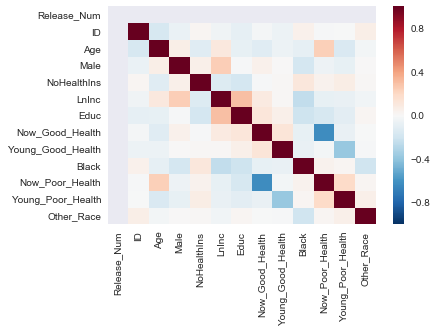

In [15]:
sb.heatmap(df.corr())

The correlation plot reveals some interesting points about the data. As expected, income and education are positively correlated, as are age and income, and Age is positively correlated with Poor_Health_Now. 
Poor_Health_Young is positively correalted (albeit slightly) with Other_Race (Not White or Black), Poor_Health_Now, and Male. 

In [16]:
cols = df.columns.tolist()
print (cols)

['Release_Num', 'ID', 'Age', 'Male', 'NoHealthIns', 'LnInc', 'Educ', 'Now_Good_Health', 'Young_Good_Health', 'Black', 'Now_Poor_Health', 'Young_Poor_Health', 'Other_Race']


In [17]:
del cols[0:2]
del cols[2]

In [18]:
target = pd.DataFrame(df["NoHealthIns"])
features = df[sorted(cols)]

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size = .10)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

est = sm.Logit(y_train, X_train).fit()
print (est.summary())

Optimization terminated successfully.
         Current function value: 0.568418
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            NoHealthIns   No. Observations:                  940
Model:                          Logit   Df Residuals:                      929
Method:                           MLE   Df Model:                           10
Date:                Sun, 26 Nov 2017   Pseudo R-squ.:                 0.06949
Time:                        22:23:56   Log-Likelihood:                -534.31
converged:                       True   LL-Null:                       -574.21
                                        LLR p-value:                 5.496e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2391      0.698      3.207      0.001       0.871       3.607
Age     

### Goal and Overview 
The goal of this assignment is to create a probability model that analyzes the effect of childhood health status
on being without health insurance later in life. I used a logistic regression for my analysis. This is a special
type of nonlinear regression which is designed for binary dependant variables. It measures the probability that Y = 1,
where Y = 1 denotes not having health insurance. Logistic regression, or logit model, outputs probabilities from the
cumulative standard logistic distribution function.

### My Process
The dataset given was very messy. I took steps to rename variables into descriptive titles rather than codes. Next, I dropped extraneous rows, ie ones without responses or invalied responses. Following, I reassign binary variables to be at index 0 and seperate categorical variables, dropping redundant columns to prevent perfect multicollinearity. I ran a correlation matrix to get a visual sense of the data. Finally, I ran a logistic regression. I removed 15% of the data to use as testing data. Results are as follows.

### A First Look at the Data
Our key question is to evaluate if childhood health status is a determinant of not obtaining health insurance in the future. Young_Good_Health, the variable for ranking a 2 (very good health; Xki = 1, where Xki represents the datapoint X of variable k at index i) has a coefficient of .19, but is not significant at the 95% level with z = 1.035. Similarly, Young_Poor_Health, the variable for ranking either 3 (good health), 4 (fair health), or 5 (poor health), has a coefficient of .26 and is also not significant with z = 1.413. Excellent health (ranking of 1) is denoted by both variables equalling zero. It is imporant to remind ourselves that a higher coefficient leads to a higher probability of *not* having health insurance. So it makes sense that having better health as a child has a lower coefficient than having poor health, and having the best health has a coefficient of 0.

### Let's Look at the Test Data

In [95]:
def logitProb (features, sortby = "", model = est, 
               data = X_test, include_const = True):
    """
    Input: features, a list of feature strings we want to look at.
    Output: logit probability of each item as a list
    """
    
    param_values = [model.params[i] for i in features]
    if include_const == True: 
        param_values = [model.params[0]] + param_values
        features = ["const"] + features

    df = pd.DataFrame(data[features])
    if sortby != "":
        df = df.sort_values(sortby)
        
    l = np.dot(df, param_values)

    df["Prediction"] = [1 / (1 + np.exp(-i)) for i in l]
    return df


In [96]:
model1 = logitProb(features=["Educ", "Male"])
model1.head()

,const,Educ,Male,Prediction
7446,1.0,11,1,0.754952
2808,1.0,11,1,0.754952
2077,1.0,16,1,0.579495
804,1.0,13,1,0.690701
4500,1.0,17,0,0.378446


In [88]:
model1.Prediction.describe()

count    105.000000
mean       0.640651
std        0.110338
min        0.378446
25%        0.576481
50%        0.655319
75%        0.723982
max        0.873215
Name: Prediction, dtype: float64

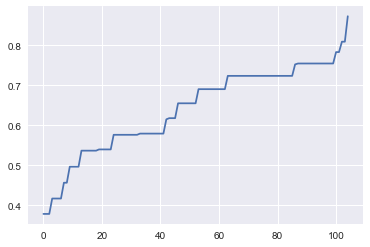

In [89]:
plt.plot(sorted(model1["Prediction"]))